<a href="https://colab.research.google.com/github/the-internet-princ3/MLDA-/blob/main/Copy_of_LINEAR_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear SVM Accuracy: 68.25%
RBF SVM Accuracy: 68.55%


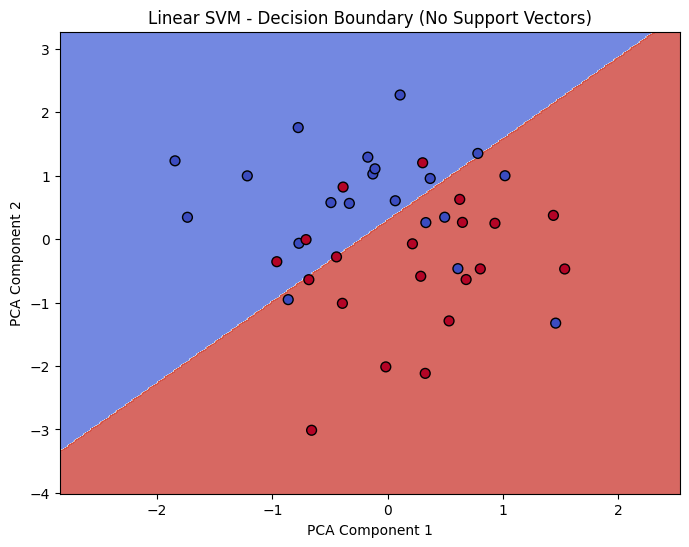

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dataset mla.csv'  # replace with your file path
data = pd.read_csv(file_path)

# Extract relevant numerical columns for features
numerical_columns = ['Duration (hours)', 'Enrolled_Students', 'Completion_Rate (%)', 'Price ($)', 'Rating (out of 5)']
X = data[numerical_columns].values

# Binary classification based on price
y = (data['Price ($)'] > 100).astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce dimensionality for visualization (PCA to 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# SVM models
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')

# Train both SVM models
linear_svm.fit(X_train_pca, y_train)
rbf_svm.fit(X_train_pca, y_train)

# Make predictions and calculate accuracy
y_pred_linear = linear_svm.predict(X_test_pca)
y_pred_rbf = rbf_svm.predict(X_test_pca)

linear_accuracy = accuracy_score(y_test, y_pred_linear)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)

# Output the accuracy
print(f"Linear SVM Accuracy: {linear_accuracy * 100:.2f}%")
print(f"RBF SVM Accuracy: {rbf_accuracy * 100:.2f}%")

# Plotting function for SVM in 2D (without support vectors)
def plot_svm_2d(X, y, model, title):
    plt.figure(figsize=(8, 6))

    # Select a subset of 40 points
    X_subset = X[:40]
    y_subset = y[:40]

    # Create a grid to plot decision boundary
    h = .02  # Step size in mesh
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the data points
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_subset, cmap=plt.cm.coolwarm, s=50, edgecolors='k')

    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plot the linear SVM without support vectors
plot_svm_2d(X_train_pca, y_train, linear_svm, "Linear SVM - Decision Boundary")
